<a href="https://colab.research.google.com/github/True-Duku/Kakaoku/blob/main/Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importation de la bibliothèque pandas et chargement du dataset et vérification
import pandas as pd
df = pd.read_csv('trumptweets.csv')
df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN


In [4]:
# vérification des types de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41122 entries, 0 to 41121
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         41122 non-null  int64  
 1   link       41122 non-null  object 
 2   content    41122 non-null  object 
 3   date       41122 non-null  object 
 4   retweets   41122 non-null  int64  
 5   favorites  41122 non-null  int64  
 6   mentions   22467 non-null  object 
 7   hashtags   5810 non-null   object 
 8   geo        0 non-null      float64
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ MB


In [6]:
# Calcul de la somme des valeur manquantes
df.isna().sum()

id               0
link             0
content          0
date             0
retweets         0
favorites        0
mentions     18655
hashtags     35312
geo          41122
dtype: int64

In [9]:
# Suppression des colonnes inutiles et contenat des valeurs manquantes
df_n = df.drop(['id', 'link','mentions','hashtags','geo'], axis=1)
df_n.head()

,content,date,retweets,favorites
0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868
1,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273
2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18
3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24
4,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965


In [15]:
# Avant de faire une analyse de sentiment ou un word cloud, faire un stop word pour
# pour diminuer la dimensionalité des mots les plus utilisés
import nltk
# Télécharger les stop words
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Dataframe tweets contenant tous les tweets
tweets = df['content']

# Définir les stop words
stop_words = set(stopwords.words('english'))

# Fonction pour supprimer les stop words d'un tweet
def remove_stop_words(tweet):
    tokens = word_tokenize(tweet)
    filtered_tweet = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tweet)

# Supprimer les stop words de chaque tweet
tweets_without_stop_words = tweets.apply(remove_stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
# importation de la bibliothèque wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

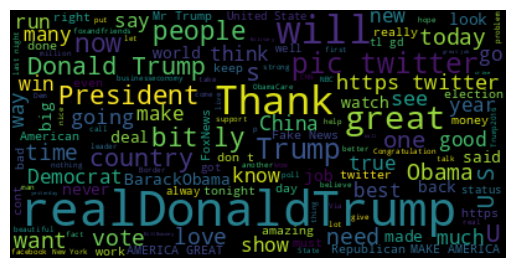

In [18]:
# Concaténation de la table tweets en une seule chaine de caractère

texte = ' '.join(tweets)

# Créer le nuage de mots
nuage_de_mots = WordCloud().generate(texte)

# Afficher le nuage de mots
plt.imshow(nuage_de_mots, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
# Passon a l'analyse de sentiment

nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
tweets = df['content']

sia = SentimentIntensityAnalyzer()

# Appliquer l'analyse de sentiment à chaque tweet
scores = tweets.apply(sia.polarity_scores)

print(scores)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0        {'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp...
1        {'neg': 0.0, 'neu': 0.74, 'pos': 0.26, 'compou...
2        {'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'comp...
3        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                               ...                        
41117    {'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'comp...
41118    {'neg': 0.203, 'neu': 0.711, 'pos': 0.086, 'co...
41119    {'neg': 0.034, 'neu': 0.595, 'pos': 0.371, 'co...
41120    {'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'comp...
41121    {'neg': 0.0, 'neu': 0.646, 'pos': 0.354, 'comp...
Name: content, Length: 41122, dtype: object


In [23]:
# afficher les tweets avec leurs scores de sentiment correspondants
df_scores = pd.DataFrame(scores)

# Afficher le DataFrame
df_scores['tweet'] = tweets
df_scores.head()

,content,tweet
0,"{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp...",Be sure to tune in and watch Donald Trump on L...
1,"{'neg': 0.0, 'neu': 0.74, 'pos': 0.26, 'compou...",Donald Trump will be appearing on The View tom...
2,"{'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'comp...",Donald Trump reads Top Ten Financial Tips on L...
3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",New Blog Post: Celebrity Apprentice Finale and...
4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","""My persona will never be that of a wallflower..."
